#Fine tuning
- Use feature extraction to to train a model on 10% of [101 food dataset](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip)
- Fine tune EfficientNetB0 model:
  - its last 20 layers
  - its last 30 layers
- Save the weights to a file using model checkpoint




#Data preprocessing

In [1]:
# run if using Google Colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-01-08 21:49:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.136.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   104MB/s    in 1.5s    

2022-01-08 21:49:02 (104 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
# unzip the data 
import zipfile
import os

zip_reference = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_reference.extractall()
zip_reference.close()

In [3]:
# observe that the unzipped data is correct
for path, dir, file in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dir)} folders, {len(file)} images in {path}")

There are 2 folders, 0 images in 10_food_classes_10_percent
There are 10 folders, 0 images in 10_food_classes_10_percent/train
There are 0 folders, 75 images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 folders, 75 images in 10_food_classes_10_percent/train/pizza
There are 0 folders, 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 folders, 75 images in 10_food_classes_10_percent/train/chicken_curry
There are 0 folders, 75 images in 10_food_classes_10_percent/train/ice_cream
There are 0 folders, 75 images in 10_food_classes_10_percent/train/fried_rice
There are 0 folders, 75 images in 10_food_classes_10_percent/train/ramen
There are 0 folders, 75 images in 10_food_classes_10_percent/train/chicken_wings
There are 0 folders, 75 images in 10_food_classes_10_percent/train/sushi
There are 0 folders, 75 images in 10_food_classes_10_percent/train/steak
There are 10 folders, 0 images in 10_food_classes_10_percent/test
There are 0 folders, 250 images in 10_f

In [4]:
# preprocess the data with TensorFlow
import tensorflow as tf

# set up global vars
SHAPE = (224,224)
BATCH = 32

# get data from directory
train_path = "/content/10_food_classes_10_percent/train"
test_path = "/content/10_food_classes_10_percent/test"

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=SHAPE,
                                                 batch_size=BATCH, label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=SHAPE,
                                               batch_size=BATCH, label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Callbacks
- ModelCheckpoint

In [5]:
# model checkpoint callback
checkpoint_path = "10p_model_chkpt_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

#Data augmentation

In [6]:
# create data augmentatio layer
data_augmentation_layer = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
], name="Data-augmentation-layer")

#Helper functions
- Plot loss curves
- Visualize data
- Compare performance


In [7]:
def plot_loss(history):
  """ Plots the accuracy and lost curves from history """
  
  import matplotlib.pyplot as plt

  # get history information
  accuracy = history.history["accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # plot curves
  plt.figure()
  plt.plot(epochs, val_accuracy, label="Validation accuracy curve")
  plt.plot(epochs, accuracy, label="Train accuracy curve")
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, val_loss, label="Validation loss curve")
  plt.plot(epochs, loss, label="Train loss curve")
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

In [8]:
def visualize(filename, augmentation=False, layer=None, img_shape=224):
  """ Visualize image, data can be augmented """ 
  import matplotlib.pyplot as plt

  # get random image from directory
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # know if data is augmented or not
  if augmentation: 
    # get the augmented image using layer
    result = layer(img)
    plt.imshow(result)
  else:
    plt.imshow(img)

In [27]:
def compare_performace(h1, h2):
  """ Compares the performance of two histories """
  import matplotlib.pyplot as plt

  # get the data
  acc_1 = h1.history["accuracy"]
  acc_2 = h2.history["accuracy"]
  loss_1 = h1.history["loss"]
  loss_2 = h2.history["loss"]
  val_loss_1 = h1.history["val_loss"]
  val_loss_2 = h2.history["val_loss"]
  val_acc_1 = h1.history["val_accuracy"]
  val_acc_2 = h2.history["val_accuracy"]
  epochs = range(len(h1.history["loss"]))

  # plot the data
  plt.figure()
  plt.plot(epochs, val_acc_1, label="Validation accuracy 1")
  plt.plot(epochs, val_acc_2, label="Validation accuracy 2")
  plt.title('Validation accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  
  plt.figure()
  plt.plot(epochs, val_loss_1, label="Validation loss 1")
  plt.plot(epochs, val_loss_2, label="Validation loss 2")
  plt.title('Validation loss')
  plt.xlabel('Epochs')
  plt.legend()

#Create Model
- Do not rescale, EfficientNetB0 has rescaling layer

In [9]:
# create model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the model
base_model.trainable = False

# create inputs to the model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input-layer")

# data augmentation 
x = data_augmentation_layer(inputs)

# pass inputs to model
x = base_model(inputs)

# average poot the outputs
x = tf.keras.layers.GlobalAveragePooling2D(name="Average-pooling-layer")(x)

# create output layer
outputs = tf.keras.layers.Dense(10, activation="softmax",
                                name="output-layer")(x)

# first model, combine
model_0 = tf.keras.Model(inputs, outputs)

# compile model
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model and save to history_0
history_0 = model_0.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data),
                        callbacks=[checkpoint_callback])

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8798 - accuracy: 0.3987
Epoch 00001: val_loss improved from inf to 1.34247, saving model to 10p_model_chkpt_weights/checkpoint.ckpt
24/24 [==============================] - 32s 699ms/step - loss: 1.8798 - accuracy: 0.3987 - val_loss: 1.3425 - val_accuracy: 0.6896
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.1427 - accuracy: 0.7267
Epoch 00002: val_loss improved from 1.34247 to 0.92956, saving model to 10p_model_chkpt_weights/checkpoint.ckpt
24/24 [==============================] - 14s 587ms/step - loss: 1.1427 - accuracy: 0.7267 - val_loss: 0.9296 - val_accuracy: 0.7872
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.8520 - accuracy: 0.7973
Epoch 00003: val_loss improved from 0.92956 to 0.75276, saving model to 10p_model_chkpt_weights/checkpoint.ckpt
24/24 [==============================] - 14s 584ms/step -

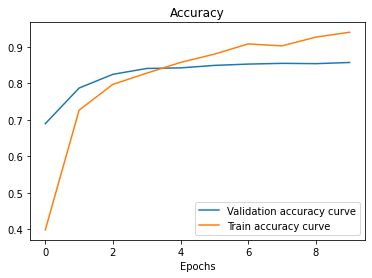

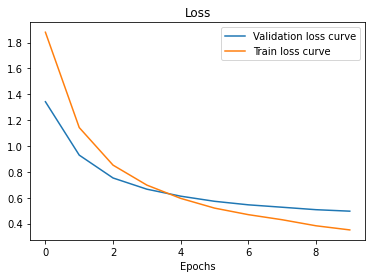

In [10]:
# observe model_0's performance
plot_loss(history_0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


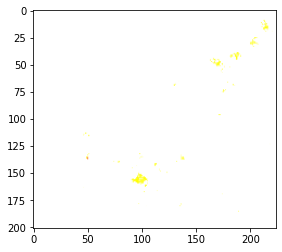

In [11]:
# visualize the augmented data (possible problem #1)
visualize("/content/10_food_classes_10_percent/test/fried_rice/1023430.jpg", augmentation=True, layer=data_augmentation_layer)

#Fine tune model_0

In [12]:
# set the last 20 layers of the model
# set all to false
for i in range(len(base_model.layers)):
  base_model.layers[i].trainable = False

# set last 20 to true
for i in range(21):
  base_model.layers[len(base_model.layers)-i-1].trainable = True

In [13]:
# check if last 20 were changed
for layer in base_model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [14]:
# after changing some settings, recompile 
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # always when recompile lower lr by 10x
                metrics=["accuracy"])

In [15]:
# fine tune for another five epochs
fine_tune_epochs = 15

# refit the model
history_1 = model_0.fit(train_data, epochs=fine_tune_epochs, steps_per_epoch=len(train_data),
                        validation_data=test_data, initial_epoch=history_0.epoch[-1], 
                        validation_steps=len(test_data))

Epoch 10/15
24/24 [==============================] - 22s 645ms/step - loss: 0.8120 - accuracy: 0.8213 - val_loss: 0.5068 - val_accuracy: 0.8404
Epoch 11/15
24/24 [==============================] - 14s 571ms/step - loss: 0.6321 - accuracy: 0.8827 - val_loss: 0.4784 - val_accuracy: 0.8508
Epoch 12/15
24/24 [==============================] - 14s 571ms/step - loss: 0.5330 - accuracy: 0.9013 - val_loss: 0.4808 - val_accuracy: 0.8516
Epoch 13/15
24/24 [==============================] - 14s 572ms/step - loss: 0.4787 - accuracy: 0.9120 - val_loss: 0.4859 - val_accuracy: 0.8452
Epoch 14/15
24/24 [==============================] - 14s 573ms/step - loss: 0.4091 - accuracy: 0.9347 - val_loss: 0.4851 - val_accuracy: 0.8476
Epoch 15/15
24/24 [==============================] - 14s 570ms/step - loss: 0.3842 - accuracy: 0.9333 - val_loss: 0.4911 - val_accuracy: 0.8456


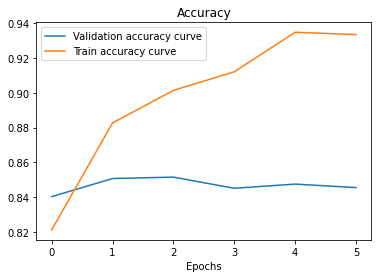

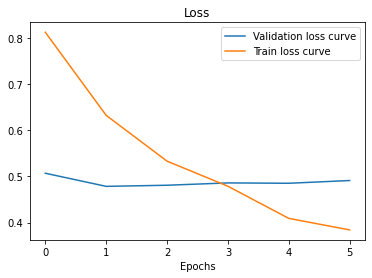

In [16]:
# plot the results
plot_loss(history_1)

In [17]:
# unfreeze 30 layers
# set all to false
for i in range(len(base_model.layers)):
  base_model.layers[i].trainable = False

# set last 20 to true
for i in range(21):
  base_model.layers[len(base_model.layers)-i-1].trainable = True

In [20]:
# reload from checkpoint, to compare histories 20 vs 30
model_0.load_weights(checkpoint_path)

In [21]:
# unfreeze 30 layers
# set all to false
for i in range(len(base_model.layers)):
  base_model.layers[i].trainable = False

# set last 20 to true
for i in range(31):
  base_model.layers[len(base_model.layers)-i-1].trainable = True

In [23]:
# confirm unfreezing
for i in base_model.layers:
  print(i.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [24]:
# recompile after alteration
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=["accuracy"])

In [25]:
# fine tune the model for 5 more epochs
fine_tune_epochs = 15

history_2 = model_0.fit(train_data, steps_per_epoch=len(train_data), epochs=15, 
                        initial_epoch=history_0.epoch[-1],
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 10/15
24/24 [==============================] - 22s 655ms/step - loss: 0.8427 - accuracy: 0.8200 - val_loss: 0.5197 - val_accuracy: 0.8376
Epoch 11/15
24/24 [==============================] - 14s 576ms/step - loss: 0.6657 - accuracy: 0.8853 - val_loss: 0.4880 - val_accuracy: 0.8524
Epoch 12/15
24/24 [==============================] - 14s 573ms/step - loss: 0.5813 - accuracy: 0.9013 - val_loss: 0.4913 - val_accuracy: 0.8444
Epoch 13/15
24/24 [==============================] - 14s 576ms/step - loss: 0.4910 - accuracy: 0.9227 - val_loss: 0.4949 - val_accuracy: 0.8408
Epoch 14/15
24/24 [==============================] - 14s 573ms/step - loss: 0.4537 - accuracy: 0.9213 - val_loss: 0.5038 - val_accuracy: 0.8352
Epoch 15/15
24/24 [==============================] - 14s 575ms/step - loss: 0.4046 - accuracy: 0.9267 - val_loss: 0.5052 - val_accuracy: 0.8384


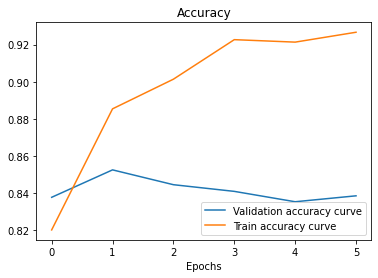

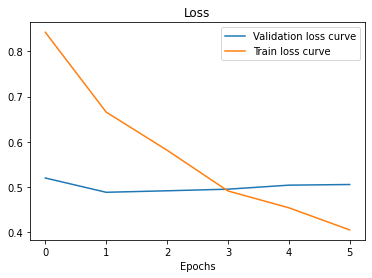

In [26]:
# observe model's performance
plot_loss(history_2)


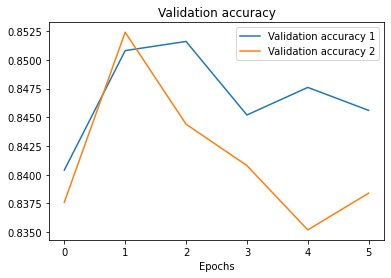

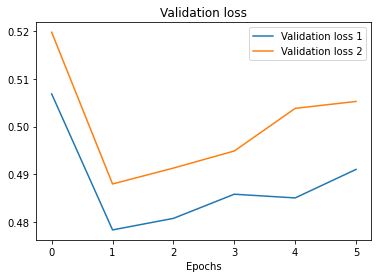

In [28]:
# compare 30 layers vs 20 layers
compare_performace(history_1, history_2)